In [4]:

import pandas as pd

# Load the dataset
file_path = '/content/dataset-tickets-multi-lang3-4k.csv'
df = pd.read_csv(file_path)
df.head()


,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,NaN,NaN,NaN,NaN
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,NaN,NaN,NaN,NaN
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,NaN,NaN,NaN,NaN
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,NaN,NaN,NaN,NaN


In [3]:

#to identify issues that can be automated
import pandas as pd

# Load the dataset
file_path = '/content/dataset-tickets-multi-lang3-4k.csv'
df = pd.read_csv(file_path)

# Analyze the dataset (assumes 'issue' or 'category' column exists for ticket type)
if 'category' in df.columns:
    # Group by category to find the most common issues
    category_counts = df['category'].value_counts()
else:
    # If categories aren't explicitly listed, extract patterns from the 'answer' column
    category_counts = df['answer'].apply(lambda x: x.split()[0]).value_counts()

# Display the top issue categories
print(category_counts.head())


answer
Dear        986
Sehr        564
Estimado    551
Cher        333
Caro        273
Name: count, dtype: int64


In [ ]:
#only got the count of answers in different languages .
#trying to classify answers into categories as given below

In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/dataset-tickets-multi-lang3-4k.csv'
df = pd.read_csv(file_path)

# Define keywords for issue categories
category_keywords = {
    "Password Reset": ["password", "reset", "login", "forgot", "access account"],
    "Account Suspension": ["suspend", "ban", "locked", "restricted", "blocked"],
    "Feature Requests": ["feature", "request", "suggestion", "enhance", "improve"],
    "Technical Issues": ["error", "issue", "problem", "bug", "failed", "not working"],
    "General Inquiry": ["question", "inquiry", "help", "support"]
}

# Function to classify issues based on keywords
def classify_issue(text):
    for category, keywords in category_keywords.items():
        if any(keyword in text.lower() for keyword in keywords):
            return category
    return "Other"

# Apply classification to the dataset
df['Issue Category'] = df['answer'].fillna("").apply(classify_issue)

# Display category distribution
print(df['Issue Category'].value_counts())


Issue Category
Technical Issues      2130
Other                  681
General Inquiry        574
Feature Requests       316
Password Reset         173
Account Suspension     126
Name: count, dtype: int64


Cluster
2    1288
3     849
4     724
0     667
1     472
Name: count, dtype: int64


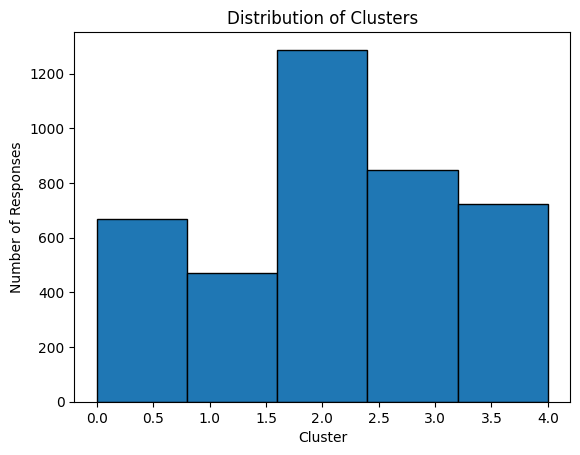

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Preprocess text data
answers = df['answer'].fillna("").astype(str)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(answers)

# Use KMeans for clustering
num_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display cluster distribution
print(df['Cluster'].value_counts())

# Visualize the clusters
plt.hist(df['Cluster'], bins=num_clusters, edgecolor='black')
plt.title("Distribution of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Responses")
plt.show()


In [7]:
# Review a few sample texts from each cluster
for cluster in range(num_clusters):
    print(f"Cluster {cluster} Sample Responses:")
    print(df[df['Cluster'] == cluster]['answer'].sample(5))
    print("\n")


Cluster 0 Sample Responses:
1893    Dear <name>,\n\nThank you for reaching out. To...
569     Dear <name>,\n\nThank you for reaching out to ...
248     Subject: Re: Request for Return: HP DeskJet 37...
29      Subject: Re: Assistance Required: Wireless Set...
3078    Dear <name>,\nThank you for contacting us. Ple...
Name: answer, dtype: object


Cluster 1 Sample Responses:
3536    Caro <name>,\n\nObrigado por trazer este probl...
1284    Prezado <name>,\n\nObrigado por entrar em cont...
896     Caro <name>,\n\nObrigado por entrar em contato...
1824    Caro <name>,\n\nObrigado por entrar em contato...
1610    Caro <name>,\n\nObrigado por entrar em contato...
Name: answer, dtype: object


Cluster 2 Sample Responses:
2242    Cher <nom>,\n\nNous sommes désolés pour ce dés...
3678    Objet : Re : Demande de support pour le routeu...
2845    Estimado <name>,\n\nGracias por comunicarse co...
2607    Estimado/a <name>,\n\nAgradecemos que te hayas...
3551    Estimado <name>,\n\nGracias por comu

In [8]:
cluster_to_category = {
    0: "Account Suspension",
    1: "Technical Issues",
    2: "Password Reset",
    3: "Feature Requests",
    4: "General Inquiry"
}

# Add a new column for readable categories
df['Category'] = df['Cluster'].map(cluster_to_category)

# Check distribution of the new categories
print(df['Category'].value_counts())





Category
Password Reset        1288
Feature Requests       849
General Inquiry        724
Account Suspension     667
Technical Issues       472
Name: count, dtype: int64


In [ ]:
#the major problems identified are password reset and feature requests.
#template for that is given below

In [ ]:
templates = {
    "Password Reset": """Dear [Customer Name],

    We understand that you're having trouble resetting your password. Please follow these steps:
    1. Click on the "Forgot Password" link on the login page.
    2. Enter your registered email address.
    3. Follow the instructions sent to your email.

    If you encounter any issues, feel free to reply to this message.

    Best regards,
    Support Team
    """,


    "Feature Requests": """Dear [Customer Name],

    Thank you for your suggestion regarding [Feature]. We appreciate your input and have forwarded your request to our development team for review. While we cannot guarantee immediate implementation, we value feedback from customers like you.

    Thank you for helping us improve!

    Best regards,
    Support Team
    """
}


In [9]:
#  variable store for dynamic template filling
variables = {
    "Customer Name": "John Doe",
    "Reason": "violation of our terms of service",
    "Feature": "Dark Mode",
    "Steps to Follow": [
        "Click on the 'Forgot Password' link",
        "Enter your registered email",
        "Follow the instructions sent to your email"
    ]
}

# Save to a JSON file for later use
import json
with open('/content/var.json', 'w') as f:
    json.dump(variables, f)


In [11]:
#to check if it was stored
import json

# Load and print the saved JSON file
file_path = '/content/var.json'

try:
    with open(file_path, 'r') as f:
        loaded_data = json.load(f)
        print("File loaded successfully. Contents:")
        print(json.dumps(loaded_data, indent=4))
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
except json.JSONDecodeError:
    print("The file could not be decoded. It might be corrupted.")


File loaded successfully. Contents:
{
    "Customer Name": "John Doe",
    "Reason": "violation of our terms of service",
    "Feature": "Dark Mode",
    "Steps to Follow": [
        "Click on the 'Forgot Password' link",
        "Enter your registered email",
        "Follow the instructions sent to your email"
    ]
}


In [12]:
def automate_response(issue_description, templates, variables):
    """
    Checks if an issue matches predefined categories and responds with a template if applicable.

    Args:
        issue_description (str): The incoming customer issue.
        templates (dict): A dictionary of templates for predefined issue categories.
        variables (dict): A dictionary of variables for dynamic template injection.

    Returns:
        str: A response message or a default message if no match is found.
    """
    # Define keywords for each category
    category_keywords = {
        "Password Reset": ["password", "reset", "login issue"],
       # "Account Suspension": ["suspend", "ban", "locked account"],
        "Feature Requests": ["feature", "suggestion", "improve"]
    }

    # Check for matching category
    for category, keywords in category_keywords.items():
        if any(keyword in issue_description.lower() for keyword in keywords):
            # Populate the template with variables
            response = templates[category]
            for key, value in variables.items():
                response = response.replace(f"[{key}]", str(value))
            return response

    # Default response for unmatched issues
    return "Thank you for reaching out.Sorry for the inconvenience. We will get back to you shortly."

# Example usage
incoming_issue = "I can't reset my password after trying multiple times."
templates = {
    "Password Reset": """Dear [Customer Name],

    We understand that you're having trouble resetting your password. Please follow these steps:
    1. Click on the "Forgot Password" link on the login page.
    2. Enter your registered email address.
    3. Follow the instructions sent to your email.

    If you encounter any issues, feel free to reply to this message.

    Best regards,
    Support Team
    """,


    "Feature Requests": """Dear [Customer Name],

    Thank you for your suggestion regarding [Feature]. We appreciate your input and have forwarded your request to our development team for review. While we cannot guarantee immediate implementation, we value feedback from customers like you.

    Thank you for helping us improve!

    Best regards,
    Support Team
    """
}

response = automate_response(incoming_issue, templates, variables)
print(response)


Dear John Doe,
    
    We understand that you're having trouble resetting your password. Please follow these steps:
    1. Click on the "Forgot Password" link on the login page.
    2. Enter your registered email address.
    3. Follow the instructions sent to your email.

    If you encounter any issues, feel free to reply to this message.

    Best regards,
    Support Team
    


In [13]:
def automate_response(issue_description, templates_input, variables): # Changed 'templates' to 'templates_input'
    """
    Checks if an issue matches predefined categories and responds with a template if applicable.

    Args:
        issue_description (str): The incoming customer issue.
        templates_input (dict): A dictionary of templates for predefined issue categories. # Updated parameter name
        variables (dict): A dictionary of variables for dynamic template injection.

    Returns:
        str: A response message or a default message if no match is found.
    """
    # Define keywords for each category
    category_keywords = {
        "Password Reset": ["password", "reset", "login issue"],
       # "Account Suspension": ["suspend", "ban", "locked account"],
        "Feature Requests": ["feature", "suggestion", "improve"]
    }


    # Check for matching category
    for category, keywords in category_keywords.items():
        if any(keyword in issue_description.lower() for keyword in keywords):
            # Populate the template with variables
            response = templates[category]
            for key, value in variables.items():
                response = response.replace(f"[{key}]", str(value))
            return response

    # Default response for unmatched issues
    return "Thank you for reaching out.Sorry for the inconvenience. We will get back to you shortly."

# Example usage
incoming_issue = "Can you add dark mode, which i believe will improve the UI"
templates = {
    "Password Reset": """Dear [Customer Name],

    We understand that you're having trouble resetting your password. Please follow these steps:
    1. Click on the "Forgot Password" link on the login page.
    2. Enter your registered email address.
    3. Follow the instructions sent to your email.

    If you encounter any issues, feel free to reply to this message.

    Best regards,
    Support Team
    """,


    "Feature Requests": """Dear [Customer Name],

    Thank you for your suggestion regarding [Feature]. We appreciate your input and have forwarded your request to our development team for review. While we cannot guarantee immediate implementation, we value feedback from customers like you.

    Thank you for helping us improve!

    Best regards,
    Support Team
    """
}

response = automate_response(incoming_issue, templates, variables) # Pass the 'templates' variable defined outside
print(response)

Dear John Doe,
    
    Thank you for your suggestion regarding Dark Mode. We appreciate your input and have forwarded your request to our development team for review. While we cannot guarantee immediate implementation, we value feedback from customers like you.

    Thank you for helping us improve!

    Best regards,
    Support Team
    
